In [6]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# generate some data
X = np.random.normal(0, 1, (100, 4))
# create linear relationships between columns
X[:, 2] = 3 * X[:, 0] - 2 * X[:, 1] + np.random.normal(0, 0.1, 100)
X[:, 3] = 1.5 * X[:, 0] - 0.5 * X[:, 1] + np.random.normal(0, 0.1, 100)

X_means = np.mean(X, axis=0)

#center each column so the mean = 0
X = X - X_means

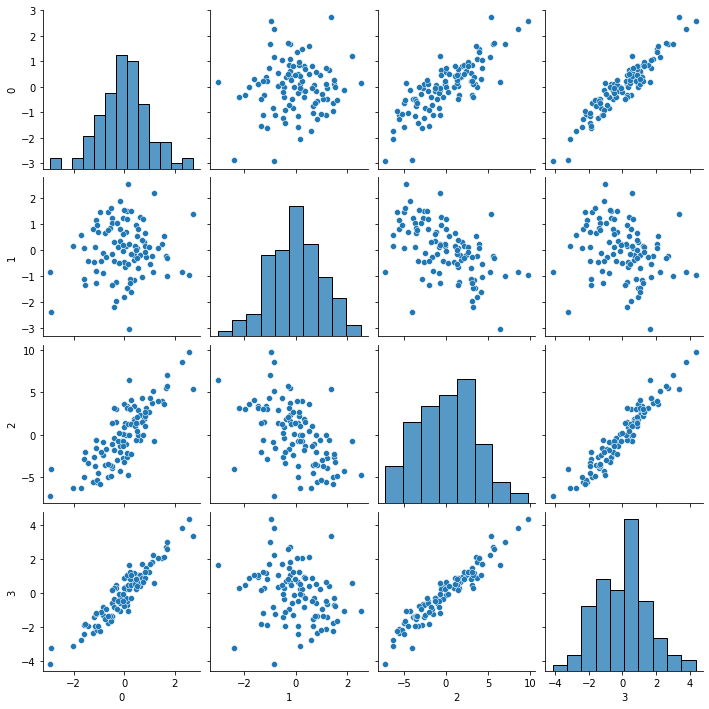

In [21]:
# check relationships between variables with a pairplot
sns.pairplot(pd.DataFrame(X));

 - x0 and x1 do not seem correlated
 - x0 seems correlated to x2 and x3
 - x1 seems a little correlated to x2 and x3
 - x2 and x3 are correlated

Given the relationships between the variables, we have evidence that not all columns are neccesary so we can perform variable reduction.


In [22]:
# Step 1. compute covariance matrix
# sum(X * X transpose)/n
# Nb: if we didn't subtract the mean above then we would do that here
cov_matrix = sum([X[i].reshape(-1,1) @ X[i].reshape(1,-1) for i in range(100)]) / 100
cov_matrix

array([[ 1.00808324,  0.08511843,  2.86437068,  1.47910101],
       [ 0.08511843,  1.06016916, -1.8774265 , -0.39873379],
       [ 2.86437068, -1.8774265 , 12.41268753,  5.25705095],
       [ 1.47910101, -0.39873379,  5.25705095,  2.43892266]])

In [14]:
# Step 2. calculate eigenvalues and eigenvectors of covariance matrix
eigs = np.linalg.eig(cov_matrix)
eigs

(array([1.55455521e+01, 1.07367495e+00, 7.43396808e-04, 7.83443199e-03]),
 array([[ 0.21482312, -0.47957103, -0.83067847, -0.18394547],
        [-0.12391288, -0.7970913 ,  0.49845262, -0.3175469 ],
        [ 0.88810001,  0.15060877,  0.22497827, -0.37145679],
        [ 0.38700775, -0.33462528,  0.10441763,  0.85284693]]))

In [16]:
# sort by magnitude of eigenvalue
eig_order = np.argsort(eigs[0])[::-1]
eig_order

array([0, 1, 3, 2])

In [18]:
pca_vectors = eigs[1][:, eig_order]
pca_vectors

array([[ 0.21482312, -0.47957103, -0.18394547, -0.83067847],
       [-0.12391288, -0.7970913 , -0.3175469 ,  0.49845262],
       [ 0.88810001,  0.15060877, -0.37145679,  0.22497827],
       [ 0.38700775, -0.33462528,  0.85284693,  0.10441763]])

In [32]:
#Check with sklearn
pca = PCA(n_components=4)
pca.fit(X)
pca.components_.T

array([[ 0.21260377, -0.4826658 , -0.19825387, -0.82615299],
       [-0.12407316, -0.79548341, -0.30820109,  0.50677813],
       [ 0.89043355,  0.14841009, -0.36376519,  0.22973337],
       [ 0.38279704, -0.33498404,  0.85637748,  0.08871152]])